In [1]:
## 1. ライブラリのインポート
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
print(rdBase.rdkitVersion) # 2019.03.2

2019.03.2


In [2]:
import os
import os.path
import sys

#自作モジュールディレクトリをパスに追加
p_mod=os.path.join(os.environ['HOME'],'notebooks/99MyModules')
sys.path.append(p_mod)

import descarray as da

#データディレクトリ
DataDir=os.path.join(os.environ['HOME'],'notebooks/50Data/')

In [3]:
TarDir=DataDir+'PCCDB_SDF/'

In [4]:
L_FP=[]
for f in os.listdir(TarDir):
    D_sdf={}
    if f.endswith('.sdf'):
        D_sdf['FN']=f
        D_sdf['RP']=os.path.join(TarDir,f)
        L_FP.append(D_sdf)
len(L_FP)

10451

In [5]:
L_sdf=[]
for D_sdf in L_FP:
    with open(D_sdf['RP'],'rb') as f:
        D_sdf_all=D_sdf.copy()
        D_sdf_all['sdf']=f.read().decode()
        L_sdf.append(D_sdf_all)
len(L_sdf)

10451

In [7]:
import py3Dmol as p3d
N_lim=10
L_mol=list(range(40,50))
view = p3d.view(width=300, height=250*N_lim, linked=False,viewergrid=(N_lim,1))
for i in range(N_lim):    
    j=L_mol[i]
    view.addModel(L_sdf[j]['sdf'],'sdf', viewer=(i,0))
    view.setStyle({'stick': {'linewidth': 5}}, viewer=(i,0))
    view.zoomTo()
view.show()

ModuleNotFoundError: No module named 'py3Dmol'

In [12]:
print(L_sdf[0]['sdf'])

PCCDB-ID:  1 
public computational chemistry database (PCCDB) project, http://pccdb.org 
 
 31 30  0  0  1  0  0  0  0  0999 V2000 
    4.5322   -3.4333   -2.9534 C   0  0  0  0  0  0  0  0  0  0  0  0 
    7.6658   -0.8281    1.9008 C   0  0  0  0  0  0  0  0  0  0  0  0 
    7.1317   -2.9727    2.9377 C   0  0  0  0  0  0  0  0  0  0  0  0 
    7.9545   -2.9319    0.6286 C   0  0  0  0  0  0  0  0  0  0  0  0 
    4.1132   -0.4153    0.2069 C   0  0  0  0  0  0  0  0  0  0  0  0 
    5.6431   -2.1618    1.1867 C   0  0  0  0  0  0  0  0  0  0  0  0 
    4.4940   -2.9881   -1.5089 C   0  0  0  0  0  0  0  0  0  0  0  0 
    5.3684   -1.2588   -0.0203 C   0  0  1  0  0  0  0  0  0  0  0  0 
    4.3759    0.6590    1.3449 C   0  0  0  0  0  0  0  0  0  0  0  0 
    7.1121   -2.2172    1.6397 N   0  0  0  0  0  0  0  0  0  0  0  0 
    3.7569   -3.4490   -0.6626 O   0  0  0  0  0  0  0  0  0  0  0  0 
    4.0444    1.8169    1.0816 O   0  0  0  0  0  0  0  0  0  0  0  0 
    4.9167    0.

In [9]:
R_TarDir=DataDir+'SDF_R/'

In [10]:
L_sdf[i]['sdf'].replace(' \n','\n')

NameError: name 'i' is not defined

In [13]:
for i in range(len(L_sdf)):
    NRP=R_TarDir+os.path.splitext(L_sdf[i]['FN'])[0]+'_NS.sdf'
    with open(NRP, mode='w') as f:
        f.write(L_sdf[i]['sdf'].replace(' \n','\n'))

In [14]:
L_FP=[]
for f in os.listdir(R_TarDir):
    D_sdf={}
    if f.endswith('.sdf'):
        D_sdf['FN']=f
        D_sdf['RP']=os.path.join(R_TarDir,f)
        L_FP.append(D_sdf)
len(L_FP)

11447

In [15]:
D_sdf=L_FP[3]
with open(D_sdf['RP'],'rb') as f:
#     print(f.read())
    suppl=Chem.ForwardSDMolSupplier(f)
    for m in suppl:
#         print(1)
        if m is not None:
            print(list(m.GetPropNames()))
            print()

['HBA', 'HBD', 'TPSA', 'cid', 'dipole', 'excitation_energy_1', 'excitation_energy_2', 'excitation_energy_3', 'excitation_energy_4', 'homo_energy', 'homo_lumo_gap', 'logP', 'lumo_energy', 'melting_point', 'molecular_refractivity', 'oscillator_strength_1', 'oscillator_strength_2', 'oscillator_strength_3', 'oscillator_strength_4', 'open_babel_can_smiles', 'mulliken_charges', 'lowdin_charges']



In [13]:
#改行前の空白があるとRdkitで読み込めないので削除
SDF_R=L_sdf[1]['sdf'].replace(' \n','\n')
# print(L_sdf[0].replace(' \n','\n'))

In [14]:
SDF_R

'PCCDB-ID:  3\npublic computational chemistry database (PCCDB) project, http://pccdb.org\n\n 19 19  0  0  1  0  0  0  0  0999 V2000\n    1.0657    0.8358    0.2463 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.2923    1.3182    0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.3550   -0.4791    0.2035 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.3396    0.4661   -0.0834 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2902   -1.4890   -0.1535 C   0  0  1  0  0  0  0  0  0  0  0  0\n   -1.1337   -1.0073    0.1976 C   0  0  1  0  0  0  0  0  0  0  0  0\n   -2.7176    0.9187   -0.3757 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.4209   -1.8479   -1.5346 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4342   -1.2858    1.5715 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.8496    2.2737   -0.3949 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.6545    0.1776   -0.5972 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.8445    1.5729    0.4255 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.4485    2

In [15]:
L_sdf[1]['sdf']

'PCCDB-ID:  3 \npublic computational chemistry database (PCCDB) project, http://pccdb.org \n \n 19 19  0  0  1  0  0  0  0  0999 V2000 \n    1.0657    0.8358    0.2463 C   0  0  0  0  0  0  0  0  0  0  0  0 \n   -0.2923    1.3182    0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0 \n    1.3550   -0.4791    0.2035 C   0  0  0  0  0  0  0  0  0  0  0  0 \n   -1.3396    0.4661   -0.0834 C   0  0  0  0  0  0  0  0  0  0  0  0 \n    0.2902   -1.4890   -0.1535 C   0  0  1  0  0  0  0  0  0  0  0  0 \n   -1.1337   -1.0073    0.1976 C   0  0  1  0  0  0  0  0  0  0  0  0 \n   -2.7176    0.9187   -0.3757 C   0  0  0  0  0  0  0  0  0  0  0  0 \n    0.4209   -1.8479   -1.5346 O   0  0  0  0  0  0  0  0  0  0  0  0 \n   -1.4342   -1.2858    1.5715 O   0  0  0  0  0  0  0  0  0  0  0  0 \n   -2.8496    2.2737   -0.3949 O   0  0  0  0  0  0  0  0  0  0  0  0 \n   -3.6545    0.1776   -0.5972 O   0  0  0  0  0  0  0  0  0  0  0  0 \n    1.8445    1.5729    0.4255 H   0  0  0  0  0  0  0  0  0  0  0  0 \

In [16]:
testF='./PCCID0001_R.sdf'
with open(testF, mode='w') as f:
    f.write(SDF_R)

In [17]:
with open('./PCCID0001_R.sdf','rb') as f:
    suppl=Chem.ForwardSDMolSupplier(f)
    for m in suppl:
        print(list(m.GetPropNames()))

['HBA', 'HBD', 'TPSA', 'cid', 'dipole', 'excitation_energy_1', 'excitation_energy_2', 'excitation_energy_3', 'excitation_energy_4', 'homo_energy', 'homo_lumo_gap', 'logP', 'lumo_energy', 'melting_point', 'molecular_refractivity', 'oscillator_strength_1', 'oscillator_strength_2', 'oscillator_strength_3', 'oscillator_strength_4', 'open_babel_can_smiles', 'mulliken_charges', 'lowdin_charges']


In [22]:
m.GetProp('lowdin_charges')

'19\n1   -0.177586\n2   -0.130328\n3   -0.157261\n4   -0.072111\n5   -0.018634\n6   -0.014572\n7   0.195218\n8   -0.447473\n9   -0.449084\n10   -0.368315\n11   -0.262187\n12   0.166273\n13   0.176094\n14   0.167126\n15   0.164229\n16   0.176665\n17   0.345174\n18   0.344452\n19   0.362319'

In [216]:
with open('./PCCID0001_R.sdf','rb') as f:
    suppl=Chem.ForwardSDMolSupplier(f)
    for m in suppl:
        print(m)

None


In [182]:
L_sdf[0].split()

['PCCDB-ID:',
 '1',
 'public',
 'computational',
 'chemistry',
 'database',
 '(PCCDB)',
 'project,',
 'http://pccdb.org',
 '31',
 '30',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0999',
 'V2000',
 '4.5322',
 '-3.4333',
 '-2.9534',
 'C',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '7.6658',
 '-0.8281',
 '1.9008',
 'C',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '7.1317',
 '-2.9727',
 '2.9377',
 'C',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '7.9545',
 '-2.9319',
 '0.6286',
 'C',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '4.1132',
 '-0.4153',
 '0.2069',
 'C',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5.6431',
 '-2.1618',
 '1.1867',
 'C',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '4.4940',
 '-2.9881',
 '-1.5089',
 'C',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5.3684',
 '-1.2

In [146]:
L_FP[3]['RP']

'./SDF/PCCID_00000005.sdf'

In [176]:
with open('./PCCID_00000003.sdf','rb') as f:
    Suppl=Chem.ForwardSDMolSupplier(f,removeHs=False)
#     print(f.read().decode())
    for m in Suppl:
        print(list(m.GetPropNames()))

['HBA', 'HBD', 'TPSA', 'cid', 'dipole']


In [179]:
print(Chem.MolToMolBlock(m))

PCCDB-ID:  3 
     RDKit          3D

 19 19  0  0  1  0  0  0  0  0999 V2000
    1.0657    0.8358    0.2463 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2923    1.3182    0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3550   -0.4791    0.2035 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3396    0.4661   -0.0834 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2902   -1.4890   -0.1535 C   0  0  1  0  0  0  0  0  0  0  0  0
   -1.1337   -1.0073    0.1976 C   0  0  1  0  0  0  0  0  0  0  0  0
   -2.7176    0.9187   -0.3757 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4209   -1.8479   -1.5346 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4342   -1.2858    1.5715 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8496    2.2737   -0.3949 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6545    0.1776   -0.5972 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8445    1.5729    0.4255 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4485    2.3855   -0.1219 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.3749  

In [157]:
print(L_sdf[1])

PCCDB-ID:  3 
public computational chemistry database (PCCDB) project, http://pccdb.org 
 
 19 19  0  0  1  0  0  0  0  0999 V2000 
    1.0657    0.8358    0.2463 C   0  0  0  0  0  0  0  0  0  0  0  0 
   -0.2923    1.3182    0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0 
    1.3550   -0.4791    0.2035 C   0  0  0  0  0  0  0  0  0  0  0  0 
   -1.3396    0.4661   -0.0834 C   0  0  0  0  0  0  0  0  0  0  0  0 
    0.2902   -1.4890   -0.1535 C   0  0  1  0  0  0  0  0  0  0  0  0 
   -1.1337   -1.0073    0.1976 C   0  0  1  0  0  0  0  0  0  0  0  0 
   -2.7176    0.9187   -0.3757 C   0  0  0  0  0  0  0  0  0  0  0  0 
    0.4209   -1.8479   -1.5346 O   0  0  0  0  0  0  0  0  0  0  0  0 
   -1.4342   -1.2858    1.5715 O   0  0  0  0  0  0  0  0  0  0  0  0 
   -2.8496    2.2737   -0.3949 O   0  0  0  0  0  0  0  0  0  0  0  0 
   -3.6545    0.1776   -0.5972 O   0  0  0  0  0  0  0  0  0  0  0  0 
    1.8445    1.5729    0.4255 H   0  0  0  0  0  0  0  0  0  0  0  0 
   -0.4485    2.

In [165]:
list(x.GetPropNames())

['HBA']

In [158]:
with open('./SDF/PCCID_00000003.sdf', 'rb') as f:
    fsuppl=Chem.ForwardSDMolSupplier(f,removeHs=False)
    fmols=[]
    for x in fsuppl:
        print(x)

In [161]:
list(x.GetPropNames())

['HBA']

In [138]:
Suppl

In [95]:
Num=48
L_FP[Num]

{'FN': 'PCCID_00000109.sdf', 'RP': './SDF/PCCID_00000109.sdf'}

In [96]:
FP=L_FP[Num]['RP']
suppl=Chem.SDMolSupplier(FP,removeHs=False)
mols = [x for x in suppl if x is not None]
len(mols) # 73

1

In [101]:
Chem.MolToSmiles(Chem.RemoveHs(mols[0]))

'N[C@@H](C[S@H]([O])O)C(=O)O'

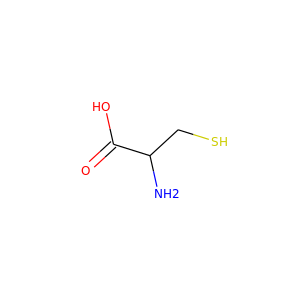

In [124]:
Draw.MolToImage(Chem.MolFromSmiles('NC(CS)C(=O)O'))

In [120]:
Chem.MolToSmiles(Chem.MolFromSmiles('NC(CS)C(=O)O'))

'NC(CS)C(=O)O'

In [98]:
print(L_sdf[Num])

PCCDB-ID:  109 
public computational chemistry database (PCCDB) project, http://pccdb.org 
 
 16 15  0  0  1  0  0  0  0  0999 V2000 
    0.3404    0.3846   -0.3080 C   0  0  0  0  0  0  0  0  0  0  0  0 
    0.4888    1.3569    0.8891 C   0  0  1  0  0  0  0  0  0  0  0  0 
   -0.0216    2.7618    0.4752 C   0  0  0  0  0  0  0  0  0  0  0  0 
   -0.2166    0.8143    2.0425 N   0  0  0  0  0  0  0  0  0  0  0  0 
   -1.0207    3.2407    0.9629 O   0  0  0  0  0  0  0  0  0  0  0  0 
    0.6710    3.3885   -0.4834 O   0  0  0  0  0  0  0  0  0  0  0  0 
    1.0920    0.2188   -2.8661 O   0  0  0  0  0  0  0  0  0  0  0  0 
    2.5515    1.6157   -1.2398 O   0  0  0  0  0  0  0  0  0  0  0  0 
    1.8549    0.2839   -1.3852 S   0  0  3  0  0  0  0  0  0  0  0  0 
   -0.5086    0.6354   -0.9529 H   0  0  0  0  0  0  0  0  0  0  0  0 
    0.1909   -0.6279    0.0783 H   0  0  0  0  0  0  0  0  0  0  0  0 
    1.5525    1.4386    1.1435 H   0  0  0  0  0  0  0  0  0  0  0  0 
   -1.1974    

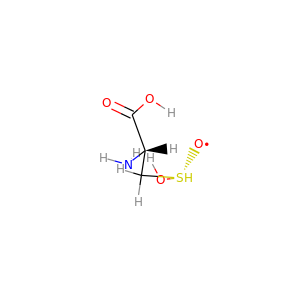

In [117]:
Draw.MolToImage(mols[0])

In [110]:
MB=Chem.MolToMolBlock(mols[0])

view = p3d.view(width=300, height=250, linked=False)
view.addModel(MB,'sdf')
view.setStyle({'stick': {'linewidth': 5}}, viewer=(0,0))
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol